In [1]:
#pip install opencv-python

<h2 style="color:green"> IMPORT LIBRARIES </h2>

In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

<h2 style="color:green"> IMPORT DATASET </h2>

In [2]:
# loading training data
train_data= tf.keras.preprocessing.image_dataset_from_directory("C:/Users/HP/Documents/train")

# loading testing data
test_data = tf.keras.preprocessing.image_dataset_from_directory('C:/Users/HP/Documents/test')
    

Found 1234 files belonging to 2 classes.
Found 218 files belonging to 2 classes.


<h2 style="color:green"> CHECK LABELED NAME </h2>

In [3]:
class_names = train_data.class_names
print(class_names)

['Closed', 'Open']


<h2 style="color:green"> TO VISUALIZE LABELED DATA</h2>

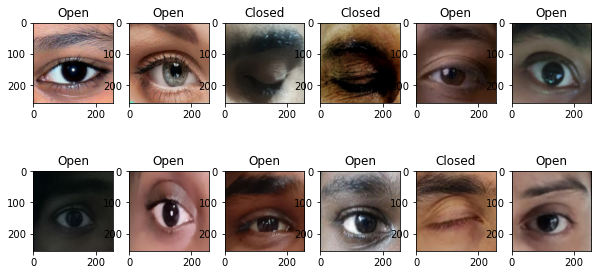

In [4]:
plt.figure(figsize=(10,5))
for images, labels in train_data.take(10):
  for i in range(12):
    ax = plt.subplot(2,6,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on")

<h2 style="color:green"> TUNING </h2>

In [5]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

<h2 style="color:green"> DEFINE MODEL </h2>

In [6]:
Cnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),

  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

In [7]:
Cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

<h2 style="color:green"> TRAIN CNN </h2>

In [8]:
Value = Cnn.fit(train_data, validation_data= test_data, epochs =5 )

Epoch 1/5
39/39 [==============================] - 189s 5s/step - loss: 0.6946 - accuracy: 0.5097 - val_loss: 0.6869 - val_accuracy: 0.6055
Epoch 2/5
39/39 [==============================] - 159s 4s/step - loss: 0.6878 - accuracy: 0.5713 - val_loss: 0.6801 - val_accuracy: 0.5963
Epoch 3/5
39/39 [==============================] - 130s 3s/step - loss: 0.6786 - accuracy: 0.5932 - val_loss: 0.6837 - val_accuracy: 0.5183
Epoch 4/5
39/39 [==============================] - 130s 3s/step - loss: 0.6705 - accuracy: 0.6110 - val_loss: 0.6868 - val_accuracy: 0.5229
Epoch 5/5
39/39 [==============================] - 129s 3s/step - loss: 0.6490 - accuracy: 0.6280 - val_loss: 0.6933 - val_accuracy: 0.5000


<h2 style="color:green"> CHECK FOR FITTING </h2>

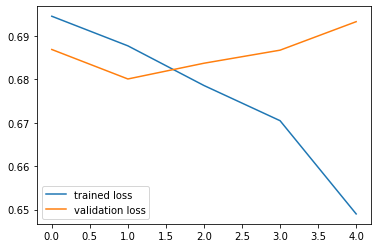

In [9]:
plt.plot(Value.history['loss'], label = 'trained loss')
plt.plot(Value.history['val_loss'], label = 'validation loss')
#plt.grid(True)
plt.legend()

<h2 style="color:green"> PREDICTED IMAGES </h2>

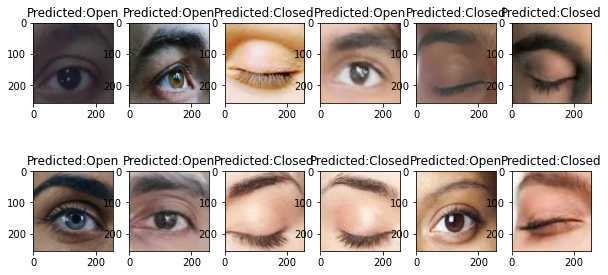

In [10]:
plt.figure(figsize=(10,5))
for images, labels in test_data.take(10):
    predictions = Cnn.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(12):
        ax = plt.subplot(2, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted:'+ predlabel[i])
        plt.axis('on')
        #plt.grid(True)

<h2 style="color:green"> LIVE IMLEMENTATION </h2>

In [13]:
#import cv2
#import os
from keras.models import load_model
#import numpy as np
from pygame import mixer
#import time


mixer.init()
alarm = mixer.Sound('clock-alarm-8761.mp3')

face = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
leye = cv2.CascadeClassifier('haarcascade_lefteye_2splits.xml')
reye = cv2.CascadeClassifier('haarcascade_righteye_2splits.xml')



lbl=['Close','Open']

model = load_model('cnncat2.h5')
path = os.getcwd()
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count=0
score=0
thicc=2
rpred=[99]
lpred=[99]

while(True):
    ret, frame = cap.read()
    height,width = frame.shape[:2] 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)    
    faces = face.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
    left_eye = leye.detectMultiScale(gray)
    right_eye =  reye.detectMultiScale(gray)

    cv2.rectangle(frame, (0,height-50) , (200,height) , (0,0,0) , thickness=cv2.FILLED )

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (100,100,100) , 1 )

    for (x,y,w,h) in right_eye:
        r_eye=frame[y:y+h,x:x+w]
        count=count+1
        r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2GRAY)
        r_eye = cv2.resize(r_eye,(24,24))
        r_eye= r_eye/255
        r_eye=  r_eye.reshape(24,24,-1)
        r_eye = np.expand_dims(r_eye,axis=0)
        #rpred = model.predict_classes(r_eye)
        predict_x=model.predict(r_eye) 
        rpred=np.argmax(predict_x,axis=1)
        if(rpred[0]==1):
            lbl='Open' 
        if(rpred[0]==0):
            lbl='Closed'
        break

    for (x,y,w,h) in left_eye:
        l_eye=frame[y:y+h,x:x+w]
        count=count+1
        l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2GRAY)  
        l_eye = cv2.resize(l_eye,(24,24))
        l_eye= l_eye/255
        l_eye=l_eye.reshape(24,24,-1)
        l_eye = np.expand_dims(l_eye,axis=0)
        #lpred = model.predict_classes(l_eye)
        predict_y=model.predict(l_eye) 
        lpred=np.argmax(predict_y,axis=1)
        if(lpred[0]==1):
            lbl='Open'   
        if(lpred[0]==0):
            lbl='Closed'
        break

    if(rpred[0]==0 and lpred[0]==0):
        score=score+20
        cv2.putText(frame,"Closed",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    if(rpred[0]==1 or lpred[0]==1):
    
        score=score-5
        
        cv2.putText(frame,"Open",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    
        
    if(score<0):
        score=0   
    cv2.putText(frame,'Seconds:'+str(score),(100,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    if(score>15):
        #person is feeling sleepy so we beep the alarm
        
        cv2.imwrite(os.path.join(path,'image.jpg'),frame)
        try:
            alarm.play()
            
        except:  # isplaying = False
            pass
        if(thicc<16):
            thicc= thicc+2
        else:
            thicc=thicc-2
            if(thicc<2):
                thicc=2
        cv2.rectangle(frame,(0,0),(width,height),(0,0,255),thicc) 
    cv2.imshow('output_frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('s'):
        break
cap.release()
cv2.destroyAllWindows()